# **<center>PYTHON IMPLEMENTATION OF STATISTICAL TECHNIQUES<center>**

## **OBJECTIVE**
The objective is to implement basic statistical techniques in Python. These Techniques include
<ol>
<li>Frequency Distribution</li>
<li>Graphical Representation of Data for grouped and ungrouped data.</li>
<li>Arithematic Mean </li>
<li>Geometric Mean</li>
<li>Harmonic Mean</li>
<li>Median</li>
<li>Mode</li>
<li>Quartiles</li>
<li>Measures of Dispersion</li>
</ol>

## **INSTALLING THE NECESSARY LIBRARIES**

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

## **IMPORTING THE LIBRARIES**

<OL>
<li><b>Pandas:</b> Popular Library for Data Analysis and Manipulation. It provides data structures like dataframes(2-D data structures) and pandas series(1-D data structures). See documentation at <a href='https://pandas.pydata.org/docs/user_guide/index.html'>Pandas Documentation</a></li>
<li><b>Numpy: </b> Python library for mathematical computation. See documentation at <a href='https://numpy.org/devdocs/user/index.html#user'>Numpy Documentation</a></li>
<li> <b>Matplotlib:</b> Popular Visulaization library that provides 2-D and 3-D graphs and charts. See documentation at <a href='https://matplotlib.org/stable/users/index.html'>Matplotlib Documentation</a></li>
<li> <b>Seaborn:</b> Advanced visualziation library built on top of Matplotlib. It provides highly attractive graphs and is mostly use for statistical analysis. <a href='https://seaborn.pydata.org/tutorial/introduction.html'>Seaborn Documentation</a></li>
</OL>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## **1. Frequency Distribution**

The organization of raw data in table form with classes
and frequencies is called frequency distribution.
Finding the frequency distribution involves following steps<br>


<ul>
<li>Sort the data in ascending order</li>
<li>Determine number of Classes</li>
<li>Determine the range of the data by subtracting the largest and smallest value</li>
<li>Find class interval</li>
<li>Determine lower class limit and upper class limit</li>
<li>Determine frequency and class mark of each class</li>
</ul>


### 1. Sorting The Data

In [ ]:
list=[ 36.3 ,42.1, 44.9,
30.1 ,37.5 ,32.9,
40.5, 40.0 ,40.2,
36.2 ,35.6 ,35.9,
38.5 ,38.8 ,38.6,
36.3 ,38.4 ,40.5,
41.0 ,39.0, 37.0
,37.0, 36.7, 37.1
,37.1 ,34.8, 33.9
,39.9 ,38.1 ,39.8]
list.sort()


### 2. Finding Max, Min Value and Class Interval

In [ ]:

smallest=min(list)
largest=max(list)

Range=largest-smallest
classes=5
class_interval=round(Range/classes,0)
print("Smallest value is",smallest,'.Largest value is',largest)

Smallest value is 30.1 .Largest value is 44.9


In [ ]:
smallest=smallest-0.1
smallest

30.0

### 3. Finding the Lower Class Boundary

In [ ]:
lower_class_intervals=[]
start=smallest
lower_class_intervals.append(smallest)
for i in range(classes-1):
    end=start+class_interval
    lower_class_intervals.append(end)
    start=end

lower_class_intervals

[30.0, 33.0, 36.0, 39.0, 42.0]

### 4. Finding Upper Class Boundary

In [ ]:
upper_class_limit=[]
start=lower_class_intervals[0]-0.1

for i in lower_class_intervals:
    upper=i+class_interval
    upper_class_limit.append(upper)

upper_class_limits=[i-0.1 for i in upper_class_limit]
upper_class_limits

[32.9, 35.9, 38.9, 41.9, 44.9]

### Storing the data in a Pandas DataFrame

In [ ]:
df=pd.DataFrame({
    'Lower': lower_class_intervals,
    'upper':upper_class_limits
})
df

,Lower,upper
0,30.0,32.9
1,33.0,35.9
2,36.0,38.9
3,39.0,41.9
4,42.0,44.9


### 5. Finding Frequency of Each Class

In [ ]:
df['frequency']=0
for i in range(len(df)):
    df['frequency'][i]=len([x for x in list if df['Lower'][i]<=x<=df['upper'][i]])

### 6. Calculating Class Boundary

In [ ]:
df['lower_class_boundary']=df['Lower']-0.05
df['upper_class_boundary']=df['upper']+0.05

### 7. Calculating Class Mark

In [ ]:
df['Class_mark']=(df['upper']+df['Lower'])/2
df

,Lower,upper,frequency,lower_class_boundary,upper_class_boundary,Class_mark
0,30.0,32.9,2,29.95,32.95,31.45
1,33.0,35.9,4,32.95,35.95,34.45
2,36.0,38.9,14,35.95,38.95,37.45
3,39.0,41.9,8,38.95,41.95,40.45
4,42.0,44.9,2,41.95,44.95,43.45


# **2. Graphical Representation of Data**
## **Grouped Data**

### **Histogram**
Histogram is the most common graphical presentation of
a frequency distribution for numerical data.
It uses a series of adjacent bars in which the width of
each bar represents the class width and the heights
represent the frequency or relative frequency of the class

C:\Users\awans\AppData\Local\Temp\ipykernel_13528\1239812076.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Class_mark', y='frequency', data=df, palette='ocean')


Text(0, 0.5, 'Frequency')

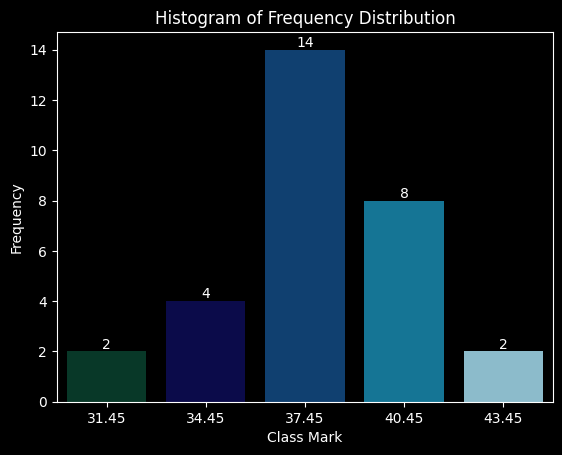

In [ ]:
ax = sns.barplot(x='Class_mark', y='frequency', data=df, palette='ocean')


for container in ax.containers:
    ax.bar_label(container)

plt.title('Histogram of Frequency Distribution')
plt.xlabel('Class Mark')
plt.ylabel('Frequency')

### **Frequency Polygon**

It is a graph that consists of line segments connecting the
intersection of the class marks and the frequencies of a
continuous frequency distribution

 It can also be constructed from histogram by joining the mid-
points of each bar

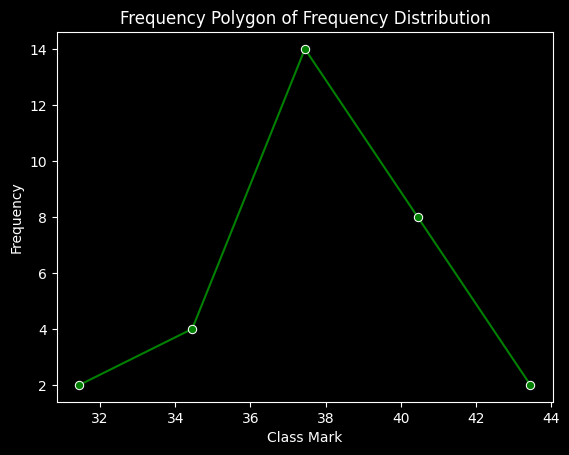

In [ ]:
ax =sns.lineplot(x='Class_mark',y='frequency',data=df,marker='o',color='g')


for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency Polygon of Frequency Distribution')
plt.xlabel('Class Mark')
plt.ylabel('Frequency')
plt.show()

### **Cumulative Frequency Distributions (OGIVE)**

In [ ]:
df

,Lower,upper,frequency,lower_class_boundary,upper_class_boundary,Class_mark
0,30.0,32.9,2,29.95,32.95,31.45
1,33.0,35.9,4,32.95,35.95,34.45
2,36.0,38.9,14,35.95,38.95,37.45
3,39.0,41.9,8,38.95,41.95,40.45
4,42.0,44.9,2,41.95,44.95,43.45


In [ ]:
df['Commulative <']=0
for i in range(len(df)):
    if i==1:
        df.loc[i,'Commulative <']=df.loc[1,'frequency']
    elif i>1 and i<5:
        df.loc[i,'Commulative <']=df.loc[i,'frequency']+df.loc[i-1,'Commulative <']

df['Commulative >']=0

df.loc[0,'Commulative >']=df.loc[len(df)-1,'Commulative <']


for i in range(1,len(df)):

    df.loc[i,'Commulative >']=df.loc[i-1,'Commulative >']-df.loc[i,'frequency']


df

,Lower,upper,frequency,lower_class_boundary,upper_class_boundary,Class_mark,Commulative <,Commulative >
0,30.0,32.9,2,29.95,32.95,31.45,0,28
1,33.0,35.9,4,32.95,35.95,34.45,4,24
2,36.0,38.9,14,35.95,38.95,37.45,18,10
3,39.0,41.9,8,38.95,41.95,40.45,26,2
4,42.0,44.9,2,41.95,44.95,43.45,28,0


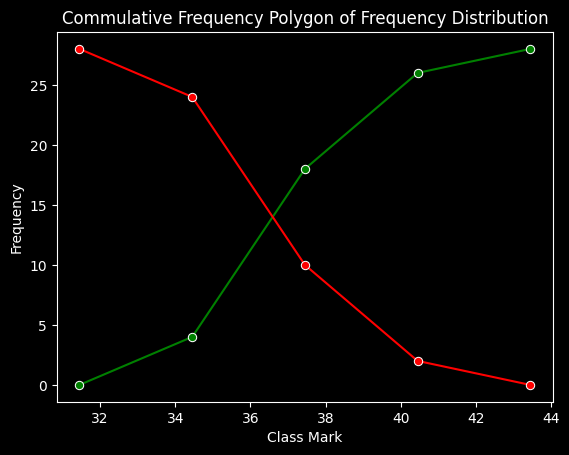

In [ ]:
ax = sns.lineplot(x='Class_mark',y='Commulative <',data=df,marker='o',color='g')
ds= sns.lineplot(x='Class_mark',y='Commulative >',data=df,marker='o',color='r')


plt.title('Commulative Frequency Polygon of Frequency Distribution')
plt.xlabel('Class Mark')
plt.ylabel('Frequency')
plt.show()

## **Ungrouped Data**

### **Simple Bar Diagram**

In [ ]:
df=pd.DataFrame({
    'Years':[1965,1966,1967,1968,1969],
    'Turnover':[35000,42000,43500,48000,48500]
})

C:\Users\awans\AppData\Local\Temp\ipykernel_13528\2777768333.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Years',y='Turnover',data=df,width=0.3,palette='plasma')


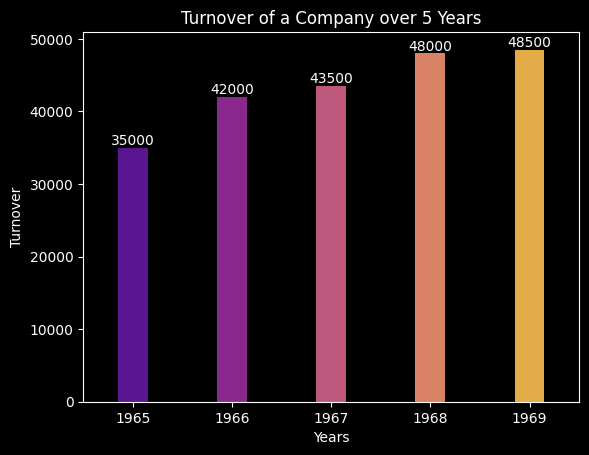

In [ ]:
ax=sns.barplot(x='Years',y='Turnover',data=df,width=0.3,palette='plasma')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Turnover of a Company over 5 Years')
plt.show()

## **Multiple Bar Plot**

In [ ]:
df=pd.DataFrame({
    'Year':['1965-66','1970-71','1975-76'],
    'Area':[2866,3233,3420],
    'Production':    [1588,2229,1937]
})

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


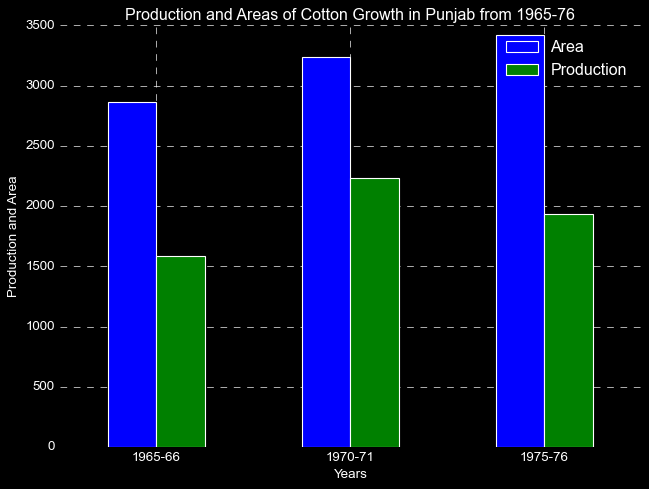

In [ ]:
N = len(df)
ind = np.arange(N)
width = 0.25
plt.style.use('dark_background')
fig, ax = plt.subplots(layout='constrained')


re1=ax.bar(ind-width/2  ,df['Area'],width,label='Area',color='blue')
re2=ax.bar(ind+width/2  ,df['Production'],width,label='Production',color='green')
ax.set_xticks(ind)
ax.set_xticklabels(df['Year'])
plt.title('Production and Areas of Cotton Growth in Punjab from 1965-76')
plt.xlabel('Years')

plt.ylabel('Production and Area')
ax.legend()
plt.grid(visible=True,which='major',axis='both',linestyle='--',linewidth=0.6)
plt.show()


## **Component Bar Graph**

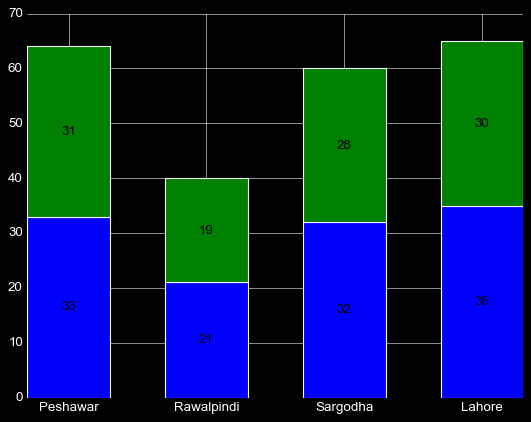

In [ ]:
df=pd.DataFrame({
"Divisions" :['Peshawar' ,'Rawalpindi' ,'Sargodha' ,'Lahore'],
'Males': [33, 21, 32, 35],
'Females': [31, 19, 28, 30]
})


width=0.6
fig,ax=plt.subplots()
color={'Males':'blue','Females':'green'}
bottom=np.zeros(len(df))
for sex in ['Males','Females']:
    p=ax.bar(df['Divisions'],df[sex],width,label=sex,bottom=bottom,color=color[sex])
    bottom+=df[sex]
    ax.bar_label(p,label_type='center',color='black')

plt.show()



## **Pie Charts**

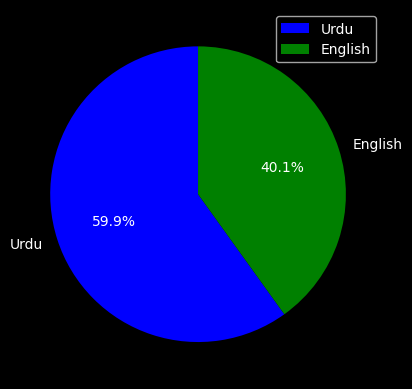

In [ ]:
df=pd.DataFrame(
    {
        'Subject':['Urdu','English'],
        'No of Students':[719,481]
    }
)
plt.style.use('dark_background')
fig,ax=plt.subplots()
p=ax.pie(df['No of Students'],labels=df['Subject'],  autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
ax.legend()

# **3. Mathematical Measures of Central Tendancy**
## **Arithematic Mean**
### **Ungrouped Data**

In [ ]:
list=[45,64,53,55,64,33]
Arithematic_mean=np.sum(list)/len(list)
print("Arithematic mean is",round(Arithematic_mean,2))

Arithematic mean is 52.33


### **Grouped Data**

The formula for calulating Arithematic Mean of grouped data is

### <center><b> A.M = Sum of product of Frequencies and Class Mark / Sum of Frequencies</b></center>

In [ ]:
df=pd.DataFrame(
    {
     'lower_class': [65,85,105,125,145,165,185],
        'upper_class':[84,104,124,144,164,184,204],
            'Frequency':[9,10,17,10,5,4,5]
    }
)

df['Class_mark']=(df['upper_class']+df['lower_class'])/2
df['Fx']=df['Frequency']*df['Class_mark']

A_M_Grouped=np.sum(df['Fx'])/np.sum(df['Frequency'])
A_M_Grouped

122.5

## **Geometric Mean**
### **Ungrouped Data**

The formula for geometric mean of ungrouped data is <br>
### **<center>G.M = antilog(sum of log of each value/total number of values)</center>**

In [ ]:
list=[45,32,37,46,39,36,41,48,36]
G_M=np.exp(np.mean(np.log(list)))
G_M=round(G_M,2)
G_M


39.68

### **Grouped Data**

The formula for Geometric Mean of Grouped Data is <br>
### **<center> G.M = Antilog(Sum of product of frquencies and Class Mark/ Sum of frequencies)</center>**

In [ ]:
df

,lower_class,upper_class,Frequency,Class_mark,Fx
0,65,84,9,74.5,670.5
1,85,104,10,94.5,945.0
2,105,124,17,114.5,1946.5
3,125,144,10,134.5,1345.0
4,145,164,5,154.5,772.5
5,165,184,4,174.5,698.0
6,185,204,5,194.5,972.5


In [ ]:
df['Log(Class_Mark)']=np.log10(df['Class_mark'])
df['f(log(Class_mark))']=df['Frequency']*df['Log(Class_Mark)']
df

,lower_class,upper_class,Frequency,Class_mark,Fx,Log(Class_Mark),f(log(Class_mark))
0,65,84,9,74.5,670.5,1.872156,16.849406
1,85,104,10,94.5,945.0,1.975432,19.754318
2,105,124,17,114.5,1946.5,2.058805,34.999693
3,125,144,10,134.5,1345.0,2.128722,21.287223
4,145,164,5,154.5,772.5,2.188928,10.944642
5,165,184,4,174.5,698.0,2.241795,8.967182
6,185,204,5,194.5,972.5,2.288920,11.444598


In [ ]:
np.sum(df['f(log(Class_mark))'])
np.sum(df['Frequency'])

60

In [ ]:
GM_Grouped=np.sum(df['f(log(Class_mark))'])/np.sum(df['Frequency'])
GM_Grouped=np.power(10,GM_Grouped)
GM_Grouped

117.70214581290175

### **Geometric Mean of Growth Rates**

Consider a stock that grows by 10% in year one, declines by
20% in year two, and then grows by 30% in year three. If the
stock is at 100 in the starting. Find the Geometric Mean of the
growth rate

In [ ]:
start=100
s=start
percent=[10,-20,30]
change_rate=[]
change=[]
for i in range(3):
    ans=start*(percent[i]/100)
    start=start+ans
    change.append(start)


for i in range(3):
    if i==0:
        ans=change[i]/s
        change_rate.append(ans)
    else:
        ans=change[i]/change[i-1]
        change_rate.append(ans)

prod=1
for i in change_rate:
    prod=prod*i

GM= prod**(1/3)
GM


1.0458643063511968

Consider a portfolio of stocks that goes up from $100 to $110 in
year one, then declines to $80 in year two and goes up to $150 in
year three. The return on portfolio is then calculated as

In [ ]:
start=100

s=start
percent=[110,80,150]

change_rate=[]
change=[]

for count,i in enumerate(percent):
    if count==0:
        ans=i/s
        change_rate.append(ans)
        change.append(i)
        continue
    else:
        ans=i/change[count-1]#80/
        change_rate.append(ans)
        change.append(i)

print("Change Rates",change_rate)

prod=1
for i in change_rate:
    prod=prod*i

GM= prod**(1/3)
print("Geometric Mean is ",GM)


Change Rates [1.1, 0.7272727272727273, 1.875]
Geometric Mean is  1.1447142425533319


## **HARMONIC MEAN**
### **Ungrouped Data**
The formula for Harmonic Mean for Ungrouped Data is <br>
### **<center> H.M = (Number of all values)/ (sum of reciprocal of all values )</center>**


The marks obtained by 9 students are 45,32,37,46,39,36,41,48,36. Calculate Harmonic Mean

In [ ]:
list=[45,32,37,46,39,36,41,48,36]
reciprocal=[1/i for i in list]
HM_Ungrouped=len(list)/np.sum(reciprocal)
HM_Ungrouped=round(HM_Ungrouped,2)
print("Harmonic Mean is",HM_Ungrouped)

Harmonic Mean is 39.36


### **Grouped Data**
The formula for Harmonic mean of Grouped data is <br>
### **<CENTER> H.M = sum of frequencies / sum of ratio of freqencies to class mark </Center>**

In [ ]:
df

,lower_class,upper_class,Frequency,Class_mark,Fx,Log(Class_Mark),f(log(Class_mark))
0,65,84,9,74.5,670.5,1.872156,16.849406
1,85,104,10,94.5,945.0,1.975432,19.754318
2,105,124,17,114.5,1946.5,2.058805,34.999693
3,125,144,10,134.5,1345.0,2.128722,21.287223
4,145,164,5,154.5,772.5,2.188928,10.944642
5,165,184,4,174.5,698.0,2.241795,8.967182
6,185,204,5,194.5,972.5,2.288920,11.444598


In [ ]:
df['Freq/Class Mark']=df['Frequency']/df['Class_mark']
df

,lower_class,upper_class,Frequency,Class_mark,Fx,Log(Class_Mark),f(log(Class_mark)),Freq/Class Mark
0,65,84,9,74.5,670.5,1.872156,16.849406,0.120805
1,85,104,10,94.5,945.0,1.975432,19.754318,0.105820
2,105,124,17,114.5,1946.5,2.058805,34.999693,0.148472
3,125,144,10,134.5,1345.0,2.128722,21.287223,0.074349
4,145,164,5,154.5,772.5,2.188928,10.944642,0.032362
5,165,184,4,174.5,698.0,2.241795,8.967182,0.022923
6,185,204,5,194.5,972.5,2.288920,11.444598,0.025707


In [ ]:
HM_Grouped = np.sum(df['Frequency'])/np.sum(df['Freq/Class Mark'])
print("Harmonic Mean is" ,HM_Grouped)

Harmonic Mean is 113.11394653762804


### **Practise Problem 1**

Calculate Geometric Mean, Harmonic Mean from the following
grouped data

In [ ]:
df=pd.DataFrame(
    {
        'Upper_Class':[2,5,8,11,14,17],
            'Lower_Class':[4,7,10,13,16,19],
            'Frequency':[3,7,9,5,4,6]
    }
)
df['Class Mark']=(df['Upper_Class']+df['Lower_Class'])/2
df['Log(X)']=np.log10(df['Class Mark'])
df['f(Log(X))']=df['Frequency']*df['Log(X)']
df['F/X']=df['Frequency']/df['Class Mark']

GM_Grouped=np.sum(df['f(Log(X))'])/np.sum(df['Frequency'])
GM_Grouped=np.power(10,GM_Grouped)

HM_Grouped=np.sum(df['Frequency'])/np.sum(df['F/X'])
print('Geometric Mean is ',GM_Grouped)
print('Harmonic Mean is ',HM_Grouped)

Geometric Mean is  9.407746996835922
Harmonic Mean is  8.127490039840637


### **Problem 2**
Calculate Arithmetic, Geometric & Harmonic Mean from the
following data

42,36,45,33,54,46,27,38,51,49,29,32

In [ ]:
list=[42,36,45,33,54,46,27,38,51,49,29,32]
AM=np.sum(list)/len(list)


GM=np.exp(np.mean(np.log(list)))
GM=round(G_M,2)

reciprocal=[1/i for i in list]
HM=len(list)/np.sum(reciprocal)
HM=round(HM,2)
print('Arithematic Mean is',AM)
print('Geometric Mean is ',GM)
print("Harmonic Mean is",HM)

Arithematic Mean is 40.166666666666664
Geometric Mean is  39.23
Harmonic Mean is 38.28


### **Problem 3**
A man travels from Lahore to Islamabad by a car and takes 4 hours
to cover the whole distance. In the first hour he travels at a speed
of 50 km/hr, in the second hour his speed is 64 km/hr, in third hour
his speed is 80 km/hr and in the fourth hour he travels at the speed
of 55 km/hr. Find the average speed of the motorist

In [ ]:
list=[50,64,80,55]
Average_speed=np.sum(list)/len(list)
print('Average Speed is',Average_speed)

Average Speed is 62.25


### **Problem 4**

If a strain of bacteria increases its population by 20% in the first
hour, 30% in the next hour and 50% in the next hour, find out an
estimate of the mean percentage growth in population. Starting
with the population of 100 bacteria

In [ ]:
percentage=[20,30,50]
AM=np.mean(percentage)
AM=round(AM,2)
print('Mean percentage change is',AM,"%")

Mean percentage change is 33.33 %


# **4. POSITIONAL MEASURES OF CENTRAL TENDENCY**

## **Median**

### **Ungrouped Data**

The formula for Median for Ungrouped Data is <br>
### **<center>If n is odd, the Median is the middle number</center>**
### **<center>If n is even, the Median is the average of the two middle numbers</center>**

In [ ]:
list=[32, 36, 36, 37, 39, 41, 45, 46, 48,49]
print('Median using Numpy ',np.median(list))
list.sort()
size=len(list)
if len(list)%2!=0:
    median=int(len(list)/2)
    print('Median using manual calculation is ',list[median])

else:
    median1=int((len(list)/2)-1)
    median2=int(len(list)/2)
    median=((list[median1]+list[median2])/2)
    print('Median using manual calculation is ',(median))

Median using Numpy  40.0
Median using manual calculation is  40.0


### **Grouped Data**



The forumula for Median of Grouped data is <br>
### **<center>Median = l + (h/f)*(n/2)+C<center>**
where, <br>
l = lower limit of median class <br>
h = class size <br>
f = frequency of median class <br>
n = total frequency <br>
C = cumulative frequency of class preceding the median class <br>

In [ ]:
df

,lower_class,upper_class,Frequency,Class_mark,Fx
0,65,84,9,74.5,670.5
1,85,104,10,94.5,945.0
2,105,124,17,114.5,1946.5
3,125,144,10,134.5,1345.0
4,145,164,5,154.5,772.5
5,165,184,4,174.5,698.0
6,185,204,5,194.5,972.5


In [ ]:
df['Lower_class_boundary']=df['lower_class']-0.5
df['Upper_class_boundary']=df['upper_class']+0.5


df['Commulative']=0

df.insert(0, 'Index', df.index)

for i in range(len(df)):
    if i==0:
        df.loc[i,'Commulative']=df.loc[i,'Frequency']
    else:
        df.loc[i,'Commulative']=df.loc[i,'Frequency']+df.loc[i-1,'Commulative']

df
#median_class=df[]

,Index,lower_class,upper_class,Frequency,Class_mark,Fx,Lower_class_boundary,Upper_class_boundary,Commulative
0,0,65,84,9,74.5,670.5,64.5,84.5,9
1,1,85,104,10,94.5,945.0,84.5,104.5,19
2,2,105,124,17,114.5,1946.5,104.5,124.5,36
3,3,125,144,10,134.5,1345.0,124.5,144.5,46
4,4,145,164,5,154.5,772.5,144.5,164.5,51
5,5,165,184,4,174.5,698.0,164.5,184.5,55
6,6,185,204,5,194.5,972.5,184.5,204.5,60


In [ ]:
sum=np.sum(df['Frequency'])
var=sum/2
median_class=df[df['Commulative']>var]

median_index=median_class.index[0]
median_index

f=df['Frequency'][median_index]
h=df['Upper_class_boundary'][median_index]-df['Lower_class_boundary'][median_index]
i=df['Lower_class_boundary'][median_index]
c=df['Commulative'][median_index-1]

Median=i+((h/f)*(((sum/2))-c))
print('Median is ' ,Median)

Median is  117.44117647058823


### **Example 2**
Find the Median for the given frequency distribution

In [ ]:

df = pd.DataFrame({
    'Lower Class Boundary': [29.95, 32.95, 35.95, 38.95, 41.95],
    'Upper Class Boundary': [32.95, 35.95, 38.95, 41.95, 44.95],
    'Rating':[2, 4, 14, 8, 2],
    'No. of Cars': [2, 4, 14, 8, 2],
    'Cummulative': [2, 6, 20, 28, 30]
})
df

sum=np.sum(df['Rating'])

var=sum/2

median_class=df[df['Cummulative']>var]

median_index=median_class.index[0]
median_index
f=df['No. of Cars'][median_index]
h=df['Upper Class Boundary'][median_index]-df['Lower Class Boundary'][median_index]
i=df['Lower Class Boundary'][median_index]
c=df['Cummulative'][median_index-1]

Median=i+((h/f)*(((sum/2))-c))
Median=round(Median,1)
print("Median is",Median)

Median is 37.9


## **Mode**

### **Ungrouped Data**

Mode of Ungrouped data is most repititive value

The Marks obtained by 9 students are given by 45,32,37,46,39,36,
41,48,36. Calculate Mode

In [ ]:
list= [32, 36, 36, 37, 39, 41, 45, 46, 48]
count=np.bincount(list)
mode=np.argmax(count)
print("Mode using Numpy is",mode)

Mode using Numpy is 36


### **Grouped Data**

The formula for Mode of Ungrouped data is <br>
### **<center>Mode =l+ (fm-f1)/( (fm-f1)-(fm-f2)) * h</center>**
where, <br>
l = lower limit of the modal class <br>
fm = frequency of the modal class <br>
f1 = frequency of the class preceding the modal class <br>
f2 = frequency of the class succeeding the modal class <br>
h = width of the class interval <br>


In [ ]:
df

,lower_class,upper_class,Frequency,Class_mark,Fx
0,65,84,9,74.5,670.5
1,85,104,10,94.5,945.0
2,105,124,17,114.5,1946.5
3,125,144,10,134.5,1345.0
4,145,164,5,154.5,772.5
5,165,184,4,174.5,698.0
6,185,204,5,194.5,972.5


In [ ]:
df.insert(0, 'Index', df.index)

In [ ]:
df

,Index,lower_class,upper_class,Frequency,Class_mark,Fx
0,0,65,84,9,74.5,670.5
1,1,85,104,10,94.5,945.0
2,2,105,124,17,114.5,1946.5
3,3,125,144,10,134.5,1345.0
4,4,145,164,5,154.5,772.5
5,5,165,184,4,174.5,698.0
6,6,185,204,5,194.5,972.5


In [ ]:
max_freq=max(df['Frequency'])
mode_class=df[df['Frequency']==max_freq]
mode_class_index=mode_class.index[0]

df['Lower_class_boundary']=df['lower_class']-0.5
df['Upper_class_boundary']=df['upper_class']+0.5

l=df['Lower_class_boundary'][mode_class_index]
h=df['Upper_class_boundary'][mode_class_index]-df['Lower_class_boundary'][mode_class_index]
f1=df['Frequency'][mode_class_index-1]
f2=df['Frequency'][mode_class_index+1]

Mode=l+((max_freq-f1)/((max_freq-f1)+(max_freq-f2)))*h

Mode

114.5

# **5. QUANTILES**

## **Quartiles**
Splitting the ranked or ordered data into 4
equal groups. Each group is called a
quarter
<ul>
<li>Each quarter has a share of 25% in it</li>

<li>Quartiles are represented as Q1 ,Q2 & Q3</li>

<li>Quartile is a measure that tells us about
the share of dataset falling below it</li>

<li>Q1 mean 25% or 1⁄4 of the data is equal to or below it for Q3 75%
or 3⁄4 of the data is equal to or below it</li>
<li>The first quartile is also known as Lower Quartile and third is
known as Upper Quartile</li>
</ul>

## **Interquartile Range**
Quartile range also known as mid-spread is the difference
between third and first quartile
### **<center>IQR=Q3-Q1</center>**
### **Ungrouped Data**
### **<center>Qi = i((n+1)/4)th Term</center>**



In [ ]:
list=[45,32,37,46,39,36,41,48,36]
list.sort()

Q1= 1*((len(list)+1)/4)
Q3= 3*((len(list)+1)/4)

IQR=  list[int(Q3-1)]-list[int(Q1-1)]

print("Doing it manually, IQR is",IQR)

Q1=np.percentile(list,25)
Q3=np.percentile(list,75)
IQR=int(Q3)-int(Q1)
print('Doing it in numpy :',IQR)



Doing it manually, IQR is 9
Doing it in numpy : 9


### **Grouped Data**

#### **Formula**
#### **<center>Qi= l+(h/f)*(((i*n)/4)-c):&nbsp; Where:i=1,2,3</center>**


In [ ]:
df=pd.DataFrame(
    {
     'lower_class': [65,85,105,125,145,165,185],
        'upper_class':[84,104,124,144,164,184,204],
            'Frequency':[9,10,17,10,5,4,5],
            'CF':[9,19,36,46,51,55,60]
    }
)
df.insert(0, 'Index', df.index)
df

,Index,lower_class,upper_class,Frequency,CF
0,0,65,84,9,9
1,1,85,104,10,19
2,2,105,124,17,36
3,3,125,144,10,46
4,4,145,164,5,51
5,5,165,184,4,55
6,6,185,204,5,60


In [ ]:
df['Lower class boundary']=df['lower_class']-0.5
df['upper class boundary']=df['upper_class']+0.5
df

,Index,lower_class,upper_class,Frequency,CF,Lower class boundary,upper class boundary
0,0,65,84,9,9,64.5,84.5
1,1,85,104,10,19,84.5,104.5
2,2,105,124,17,36,104.5,124.5
3,3,125,144,10,46,124.5,144.5
4,4,145,164,5,51,144.5,164.5
5,5,165,184,4,55,164.5,184.5
6,6,185,204,5,60,184.5,204.5


In [ ]:
def quartile(num):
    Q1_freq=num * (np.sum(df['Frequency']))/4
    refernce=df[df['CF']>Q1_freq]
    refernce_index=refernce.iloc[0]['Index']
    h=df.loc[refernce_index,'upper class boundary']-df.loc[refernce_index,'Lower class boundary']
    l=df.loc[refernce_index,'Lower class boundary']
    f=df.loc[refernce_index,'Frequency']
    c=df.loc[refernce_index-1,'CF']
    return (h,l,f,c)


In [ ]:
h,l,f,c=quartile(1)
h1,l1,f1,c1=quartile(3)

In [ ]:
h,l,f,c

(20.0, 84.5, 10, 9)

In [ ]:
Q1=l+(h/f)*((1*np.sum(df['Frequency'])/4)-c)
Q3=l1+(h1/f)*((3*np.sum(df['Frequency'])/4)-c1)
print('Q1 is ',Q1)
print('Q3 is ',Q3)

Q1 is  96.5
Q3 is  142.5


In [ ]:
IQR=Q3-Q1
print('IQR is',IQR)

IQR is 46.0


## **DECILES**
Divide the data into ten equal parts. The 5th Decile is Median.
### **Ungrouped Data**
### **<center> Pi= i * ((n+1)/10)th Term  where i = 1, 2, 3</center>**

In [ ]:
list=[45,32,37,46,39,36,41,48,36,43,54,23,27]
list.sort()
print(list)
for i in range(1,11):
    p = i * ((len(list)+1))/10
    term2= p%10
    term1 = int(p)
    if term1>len(list):
        term1=len(list)-1
    decile=list[term1-1]+(term2/10)*(list[term1]-list[term1-1])
    print('Decile',i,'is',round(decile,2))


[23, 27, 32, 36, 36, 37, 39, 41, 43, 45, 46, 48, 54]
Decile 1 is 23.56
Decile 2 is 28.4
Decile 3 is 36.0
Decile 4 is 36.56
Decile 5 is 40.4
Decile 6 is 42.68
Decile 7 is 44.96
Decile 8 is 46.24
Decile 9 is 49.56
Decile 10 is 50.4


In [ ]:
deciles=np.quantile(list, np.arange(0, 1, 0.1))
print('Deciles using numpy is',deciles)

Deciles using numpy is [23.  28.  33.6 36.  36.8 39.  41.4 43.8 45.6 47.6]


Both answers have a slight difference due to the interpolation ethod being used. NumPy's quantile function uses a more sophisticated method called "linear interpolation with midpoint averaging". My hard code uses the simple linear interpolation

### **Grouped Data**
#### **Formula**
### **<center>Di= l + (h/f)*((in/10)-c)</center>**

Find the 8th Decile of the given data

In [ ]:
df

,Index,lower_class,upper_class,Frequency,CF,Lower class boundary,upper class boundary
0,0,65,84,9,9,64.5,84.5
1,1,85,104,10,19,84.5,104.5
2,2,105,124,17,36,104.5,124.5
3,3,125,144,10,46,124.5,144.5
4,4,145,164,5,51,144.5,164.5
5,5,165,184,4,55,164.5,184.5
6,6,185,204,5,60,184.5,204.5


In [ ]:
ref_class = 8 *( np.sum(df['Frequency'])/10)
ref_class_index=df[df['CF']>ref_class]
refernce_index=ref_class_index.iloc[0]['Index']

f=df.loc[refernce_index,'Frequency']
c=df.loc[refernce_index-1,'CF']
l=df.loc[refernce_index,'Lower class boundary']
h=df.loc[refernce_index,'upper class boundary']-df.loc[refernce_index,'Lower class boundary']

In [ ]:
(f,c,l,h)

(5, 46, 144.5, 20.0)

In [ ]:
ref_class = 8 * (np.sum(df['Frequency']) / 10)
D8_Decile =  l + (ref_class-c)/f * h
print('8th Decile is ',D8_Decile)

8th Decile is  152.5


## **Percentile**

### **Ungrouped Data**

In [ ]:
list=[21,32,23,35,54,32,43,32,43,12,34,23]
list.sort()
Pi = 75 * (len(list)+1)/100
term1=int(Pi)
term2=Pi -term1

per_75 = list[term1-1] + term2 * (list[term1]- list[term1-1])

np_percent=np.percentile(list,75)

print('75th percentile using formula is ',per_75)
print('75th percentile using numpy is ',np_percent)

75th percentile using formula is  41.0
75th percentile using numpy is  37.0


### **Grouped Data**

In [ ]:
df

,Index,lower_class,upper_class,Frequency,CF,Lower class boundary,upper class boundary
0,0,65,84,9,9,64.5,84.5
1,1,85,104,10,19,84.5,104.5
2,2,105,124,17,36,104.5,124.5
3,3,125,144,10,46,124.5,144.5
4,4,145,164,5,51,144.5,164.5
5,5,165,184,4,55,164.5,184.5
6,6,185,204,5,60,184.5,204.5


In [ ]:
ref_class = 75 *( np.sum(df['Frequency'])/100)
ref_class_index=df[df['CF']>ref_class]
refernce_index=ref_class_index.iloc[0]['Index']

f=df.loc[refernce_index,'Frequency']
c=df.loc[refernce_index-1,'CF']
l=df.loc[refernce_index,'Lower class boundary']
h=df.loc[refernce_index,'upper class boundary']-df.loc[refernce_index,'Lower class boundary']

ref_class = 75 * (np.sum(df['Frequency']) / 100)
D8_percentile =  l + (ref_class-c)/f * h
print('75th percentile is ',D8_percentile)

75th percentile is  142.5


# **7. Measures of Dispersion**

## **Range**
The range is defined as the difference between the two extreme
values of a data-set

### **Ungrouped Data**

In [ ]:
list=[21,32,23,35,54,32,43,32,43,12,34,23]
range=max(list) - min(list)
print('Range is',range)

Range is 42


### **Grouped Data**

In [ ]:
df=pd.DataFrame(
    {
     'lower_class': [65,85,105,125,145,165,185],
        'upper_class':[84,104,124,144,164,184,204],
            'Frequency':[9,10,17,10,5,4,5],
            'CF':[9,19,36,46,51,55,60]
    }
)
df.insert(0, 'Index', df.index)
df['Lower class boundary']=df['lower_class']-0.5
df['upper class boundary']=df['upper_class']+0.5
df

,Index,lower_class,upper_class,Frequency,CF,Lower class boundary,upper class boundary
0,0,65,84,9,9,64.5,84.5
1,1,85,104,10,19,84.5,104.5
2,2,105,124,17,36,104.5,124.5
3,3,125,144,10,46,124.5,144.5
4,4,145,164,5,51,144.5,164.5
5,5,165,184,4,55,164.5,184.5
6,6,185,204,5,60,184.5,204.5


In [ ]:
range= df.loc[6,'upper class boundary']-df.loc[0,'Lower class boundary']
print('Range is',range)

Range is 140.0


## **Coefficient of Range**

In [ ]:
max_value = df.loc[6,'upper class boundary']
min_value = df.loc[0,'Lower class boundary']
coef_range =(max_value - min_value) /  (max_value + min_value)
coef_range=round(coef_range*100,2)
print('Coefficient of Range',coef_range,'%')

Coefficient of Range 52.04 %


## **Quartile Deviation(QD)**
 The difference between third and first quartiles is called
Interquartile Range <br>
### **<center>Quartile Deviation = (Q3 - Q1) / 2</center>**
 Half of the Interquartile Range is called Quartile Deviation also
known as Semi Interquartile Range

In [ ]:
h,l,f,c=quartile(1)
h3,l3,f3,c3=quartile(3)


In [ ]:
(h,l,f,c)

(20.0, 84.5, 10, 9)

In [ ]:
(h3,l3,f3,c3)

(20.0, 124.5, 10, 36)

In [ ]:
Q1 = l + (h / f) * ((np.sum(df['Frequency'])/4) - c)
Q3 = l3 + (h3 / f3) * (3*(np.sum(df['Frequency'])/4) - c3)
quar_Dev=(Q3-Q1)/2
print('Quartile Deviation',quar_Dev)

Quartile Deviation 23.0


In [ ]:
(Q3,Q1)

(82.5, 96.5)

## **Coefficient of  Quartile Deviation(QD)**

### **<center>Coeficient of Quartile Deviation = (Q3 - Q1) / (Q3 + Q1)</center>**

In [ ]:
Coef_QD= round(((Q3 - Q1) / (Q3 +Q1)),2 ) *100
print('Coefficient of Quartile Deviation is',Coef_QD,'%')

Coefficient of Quartile Deviation is 19.0 %


## **Mean Deviation**
It is the average distance of all values of data set from Mean of
that same data set

### **Ungrouped Data**
Mean Deviation = M. D = ∑ |(x − x̄)| / n

In [ ]:
listt = [45, 32, 37, 46, 39, 36, 41, 48, 36]

mean_val = np.mean(listt)
print("Mean:", mean_val)

mad_sum = 0.0

for value in listt:
    mad_sum += abs(value - mean_val)
mean_dev = mad_sum / len(listt)
print("Mean Deviation:", mean_dev)

Mean: 40.0
Mean Deviation: 4.444444444444445


### **Grouped Data**

 Mean for Grouped data x =∑ fx /n <br>
 Find difference of Mean from class marks |x − x̄| <br>
 Product of frequency with difference f x − x̄<br>
 Sum of product f x − x̄<br>

In [ ]:
df=pd.DataFrame(
    {
        'lower class':[1,6,11,16,21],
        'upper class':[5,10,15,20,25],
        'classs_mark':[3,8,13,18,23],
        'frequency':[10,20,30,20,10]
    }
)
df

,lower class,upper class,classs_mark,frequency
0,1,5,3,10
1,6,10,8,20
2,11,15,13,30
3,16,20,18,20
4,21,25,23,10


In [ ]:
df['fx']=df['classs_mark']*df['frequency']
mean_of_data=np.sum(df['fx']) / np.sum(df['frequency'])
df['|x-mean|']=df['classs_mark']-mean_of_data
df['f|x-mean|']=np.abs(df['|x-mean|']*df['frequency'])
mean_devation=np.sum(df['f|x-mean|'])/np.sum(df['frequency'])
print('Mean deviation is ',mean_devation)
coef_dev=(mean_devation/mean_of_data)*100
print("Coefficient of mean deviation is ",coef_dev,'%')


Mean deviation is  4.444444444444445
Coefficient of mean deviation is  34.18803418803419 %


## **VARIANCE**
### Ungrouped Data
#### Formula :             N = Σ  Σ(x-x)^2 / n

In [14]:
lis=[1,4,2,5,7,4,6,8,9,4,2]
variance_ungrouped= (np.sum(np.power(lis - np.mean(lis), 2))) / (len(lis) - 1)
print('Variance using formula is',variance_ungrouped)
print('Variance using numpy is',np.var(lis))

Variance using formula is 6.618181818181817
Variance using numpy is 6.016528925619834


### **Grouped Data**
#### Formula: Variance = (Σf(x)^2 / Σf ) - (Σf(x) / Σf )^2

In [8]:
df=pd.DataFrame(
    {
        'lower':[0,5,10,20,40],
        'upper':[5,10,20,40,60],
        'no. of bulbs':[4,9,38,33,16]
    
    }
)
df


,lower,upper,no. of bulbs
0,0,5,4
1,5,10,9
2,10,20,38
3,20,40,33
4,40,60,16


In [11]:
df['midpoint']=(df['upper']+df['lower'])/2
df['X^2']=np.power(df['midpoint'],2)
df['fx']=df['midpoint'] * df['no. of bulbs']
df['fx^2']=df['X^2'] * df['no. of bulbs']

df

,lower,upper,no. of bulbs,midpoint,X^2,fx,fx^2
0,0,5,4,2.5,6.25,10.0,25.00
1,5,10,9,7.5,56.25,67.5,506.25
2,10,20,38,15.0,225.00,570.0,8550.00
3,20,40,33,30.0,900.00,990.0,29700.00
4,40,60,16,50.0,2500.00,800.0,40000.00


In [13]:
variance= (np.sum(df['fx^2']))/np.sum(df['no. of bulbs']) - np.power((np.sum(df['fx'])/np.sum(df['no. of bulbs'])),2)
print('Variance of grouped data is',variance)

Variance of grouped data is 193.671875


## STANDARD DEVIATION
### Ungrouped Data
Formula: square root of variance

In [18]:
std_ungrouped=np.sqrt(variance_ungrouped)
print('Standard Devation of ungrouped data is',std_ungrouped)
print('Standard devaition using Numpy is',np.std(lis))

Standard Devation of ungrouped data is 2.572582713574399
Standard devaition using Numpy is 2.4528613751330983


### Grouped Data
Formula: Square root of Variance

In [16]:
std=np.sqrt(variance)
print('Standard Devation of grouped data is',std)


Standard Devation of grouped data is 13.91660429127738


### COEFFICIENT OF VARIATION

In [20]:
variation=(std_ungrouped/np.mean(lis))*100
print('Coefficient of Variation is',variation)

Coefficient of Variation is 54.4200189409969


## **<center>MEASURE OF SKEWNESS AND KURTOSIS</center>**

## **KARL PEARSON'S METHOD**
### SK=3(MEAN-MEDIAN)/SD

In [31]:
df=pd.DataFrame(
    {
     'lower_class': [65,85,105,125,145,165,185],
        'upper_class':[84,104,124,144,164,184,204],
            'Frequency':[9,10,17,10,5,4,5]
    }
)
df['lower_boundary']=df['lower_class']-0.5
df['upper_boundary']=df['upper_class']+0.5
df['X']=(df['upper_boundary']+df['lower_boundary'])/2
df['X^2']=np.power(df['X'],2)

df.loc[0,'CF']=df.loc[0,'Frequency']
for i in range(1,len(df)):
    df.loc[i,'CF']=df.loc[i-1,'CF']+df.loc[i,'Frequency']
df['fx']=df['Frequency']*df['X']
df['fx^2']=df['X^2']*df['Frequency']
df


,lower_class,upper_class,Frequency,lower_boundary,upper_boundary,X,X^2,CF,fx,fx^2
0,65,84,9,64.5,84.5,74.5,5550.25,9.0,670.5,49952.25
1,85,104,10,84.5,104.5,94.5,8930.25,19.0,945.0,89302.50
2,105,124,17,104.5,124.5,114.5,13110.25,36.0,1946.5,222874.25
3,125,144,10,124.5,144.5,134.5,18090.25,46.0,1345.0,180902.50
4,145,164,5,144.5,164.5,154.5,23870.25,51.0,772.5,119351.25
5,165,184,4,164.5,184.5,174.5,30450.25,55.0,698.0,121801.00
6,185,204,5,184.5,204.5,194.5,37830.25,60.0,972.5,189151.25


In [33]:
mean=np.sum(df['Frequency']*df['X'])/np.sum(df['Frequency'])
sum=np.sum(df['Frequency'])
var=sum/2
median_class=df[df['CF']>var]

median_index=median_class.index[0]
median_index

f=df['Frequency'][median_index]
h=df['upper_boundary'][median_index]-df['lower_boundary'][median_index]
i=df['lower_boundary'][median_index]
c=df['CF'][median_index-1]

Median=i+((h/f)*(((sum/2))-c))

Std_grouped=np.sqrt( (np.sum(df['fx^2']))/np.sum(df['Frequency']) - np.power((np.sum(df['fx'])/np.sum(df['Frequency'])),2) )
pearson=(3*(mean-Median))/Std_grouped
print('Measure of skewness is',pearson)


Measure of skewness is 0.4352151421956248
